# Running data preprocessing and aligner.

In [ ]:
!git clone --recursive -j8 https://github.com/Nanobiosensorics/cell-aligner.git
!mv cell-aligner/* ./
!rm -rf cell-aligner

In [ ]:
!pip install -r requirements.txt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
dataset_zip_name = "mikroszkop-bioszenzor"
dataset_name = "20200722_Preo_Hela_fn"
model_name = "cyto3_old_annotated"

In [ ]:
!unzip "/content/drive/MyDrive/szakdolgozat/kepillesztes/{dataset_zip_name}.zip" -d "/content/datasets"
!mkdir models
!cp "/content/drive/MyDrive/szakmai gyakorlat/cellpose-cell-counting/models/{model_name}" "/content/models"

In [6]:
import os

file_path = "./nanobio_core/epic_cardio/data_correction.py"
backup_file_path = "./nanobio_core/epic_cardio/data_correction.bak"

if not os.path.exists(backup_file_path):
  os.rename(file_path, backup_file_path)

  with open(backup_file_path, 'r') as file:
    lines = file.readlines()

  with open(file_path, 'w') as file:
    for line in lines:
      if "matplotlib.use('Qt5Agg')" in line:
        file.write("# " + line)
      else:
        file.write(line)

In [8]:
!python data_reading.py --input_path "/content/datasets/{dataset_name}" --output_path "/content/preprocessed.pkl" --cellpose_model_path="/content/models/{model_name}" --flip=0,1 --scaling="MIC_10X"

Measurement mode normal
(153600,)
Measurement loaded (1097, 240, 320) time (1097,)
[(1, 375)]
Parsing finished!
Parsing finished!
/usr/local/lib/python3.10/dist-packages/cellpose/resnet_torch.py:276: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open a

# Evaluating results

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pickle

with open("/content/drive/MyDrive/szakdolgozat/preprocessed.pkl", "rb") as file:
  preprocessed = pickle.load(file)

In [3]:
print(preprocessed.keys())

dict_keys(['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4'])


In [7]:
import numpy as np

well_id = "A4"

well = preprocessed[well_id]["well_data"][0]
points = preprocessed[well_id]["well_data"][1]

(4189, 4189)


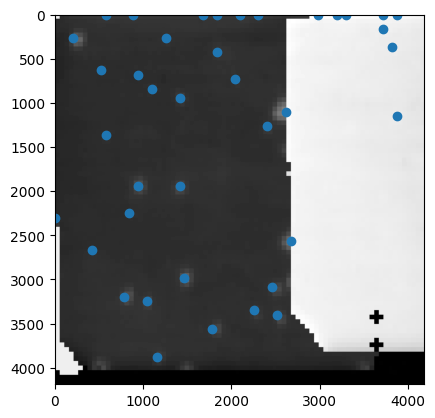

In [10]:
import matplotlib.pyplot as plt

plt.imshow(well, cmap="gray")
plt.scatter(points[:, 0], points[:, 1])
plt.show()